In [62]:
import pandas as pd
from datetime import datetime
import statistics as stat
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import random

# импорты для построения и обучения модели
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [63]:
RANDOM_SEED = 42
!pip freeze > requirements.txt

## Определяем функции для дальнейшей работы

In [64]:
# Читает датасет и меняет названия колонок исходного датафрейма на более удобные
def read_df():
    rd_df = pd.read_csv('../input/sf-dst-restaurant-rating/main_task.csv')
    rd_df.columns = [
        'id', 'city_name', 'cuisine', 'rank', 'rating', 'price', 
        'reviews count', 'reviews', 'url_ta', 'id_ta'
        ]
    return rd_df

In [65]:
# Удаляет строковые колонки
def drop_non_numeric(ds_df):
    for column_name in ds_df:
        type = ds_df[column_name].dtype
        if type not in ['int64', 'float64']:
            df.drop(column_name, axis='columns', inplace=True)

In [66]:
# Удаляет колонки с пропусками
def fill_gaps(ds_df, value):
    for column_name in ds_df:
        if ds_df[column_name].isna().value_counts()[False] < ds_df.shape[0]:
            ds_df[column_name].fillna(value = value, inplace = True)

In [67]:
# Тестирует модель и выводит МАЕ    
def test_model(tm_df):
    drop_non_numeric(tm_df)
    fill_gaps(tm_df, 0)
    X = tm_df.drop(['rating'], axis = 1)
    y = tm_df['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)
    regr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

## Общий взгляд на датасет

Посмотрим на колонки

In [68]:
df = read_df()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40000 non-null  object 
 1   city_name      40000 non-null  object 
 2   cuisine        30717 non-null  object 
 3   rank           40000 non-null  float64
 4   rating         40000 non-null  float64
 5   price          26114 non-null  object 
 6   reviews count  37457 non-null  float64
 7   reviews        40000 non-null  object 
 8   url_ta         40000 non-null  object 
 9   id_ta          40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


,id,city_name,cuisine,rank,rating,price,reviews count,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


Видим три числовые колонки. Остальные текстовые. Посмотрим на пропуски.

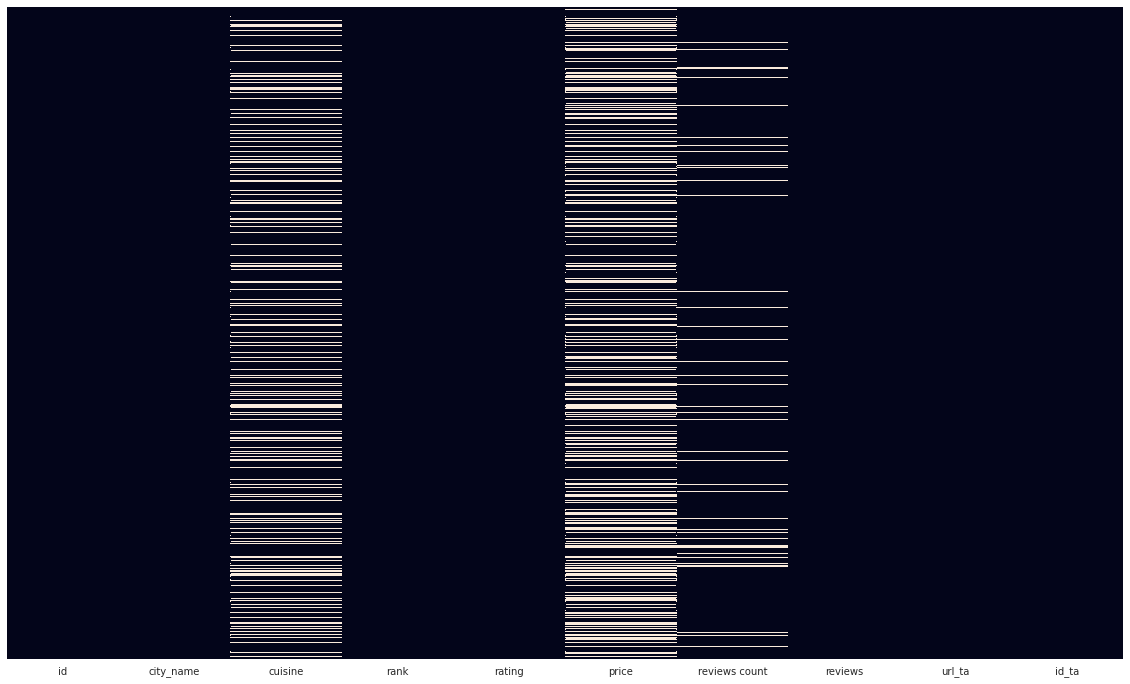

In [69]:
df = read_df()
fig, ax = plt.subplots(figsize=(20, 12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

Видим большое количество пропусков в полях cuisine и price. Также видим намного меньше пропусков в поле reviews_count.

### Тестируем исходный датасет, удалив строки и пропуски

In [70]:
df = read_df()
test_model(df)

MAE: 0.42532669503968257


## Колонки
Поочередно работаем с колонками, пытаясь преобразовать данные или создать новые на их основе.

### -----> id

Преобразуем id в число.

In [71]:
def id_as_int(iai_df):
    iai_df['id'] = iai_df['id'].str[3:].astype(int)

Посмотрим

'Коэфициент корреляции:-0.37'

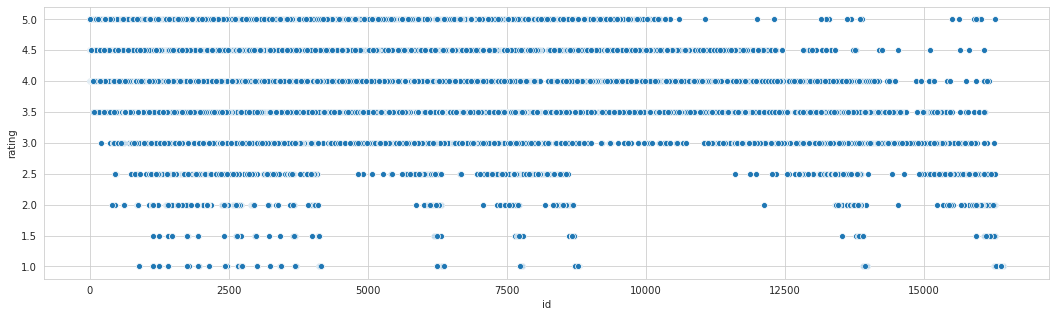

In [72]:
df = read_df()
id_as_int(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'id', y = 'rating')

corr_coef = df[['id','rating']].corr().loc['rating']['id'];
display('Коэфициент корреляции:' + str(round(corr_coef, 2)))

Из графика мало что понятно, но коэфициент корреляции относительно высок. Тестируем.

In [73]:
df = read_df()
id_as_int(df)
test_model(df)

MAE: 0.4137586875


Результат улучшился, значит двигаемся в правильном направлении =)

### -----> city_name

Добавим информацию о том, является ли город столицей, как далеко от столицы он расположен, в какой стране он находится, его неселение и плотность неселения.

Добавим новые данные о  городах.

In [74]:
def city_insights(ci_df):
    # вставим новые столбцы
    ci_df.insert(1, 'city_name_length', ci_df['city_name'].str.len()) # длина имени города
    ci_df.insert(2, 'city_count', 0) # кол-во ресторанов из датасета в этом городе
    ci_df.insert(3, 'city_id', 0) # числовой идентификатор города
    ci_df.insert(4, 'country_id', 0) # числовой идентификатор страны
    ci_df.insert(5, 'is_in_capital', 0) # является ли город столицей
    ci_df.insert(6, 'far_from_capital', 0) # удаленность города от столицы
    ci_df.insert(7, 'city_population', 0) # население города
    ci_df.insert(8, 'city_density', 0) # плотность населения города
    
    # список стран
    countries = [
        'UK', 'France', 'Spain', 'Germany', 'Italy', 'Czech Republic', 'Portugal', 'Austria', 
        'Netherlands', 'Belgium', 'Sweden', 'Hungary', 'Poland', 'Ireland', 'Denmark', 'Greece',
        'Switzerland', 'Norway', 'Finland', 'Slovakia', 'Luxembourg', 'Slovenia'
        ]
    
    # словарь городов
    df_cities = df['city_name'].value_counts().reset_index()
    df_cities.columns = ['name', 'count']
    cities = {}
    count = df_cities['name'].size
    for i in range(0, count):
        city = df_cities.loc[i]
        cities[city['name']] = {
            'id': int(i),
            'count': city['count']
        }
    cities['London'].update({
        'country_id': countries.index('UK'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 9304,
        'density': 5590,
    })
    cities['Paris'].update({
        'country_id': countries.index('France'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2148,
        'density': 21000,
    })
    cities['Madrid'].update({
        'country_id': countries.index('Spain'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 6618,
        'density': 5337,
    })
    cities['Barcelona'].update({
        'country_id': countries.index('Spain'),
        'is_capital': 0,
        'far_from_capital': 504,
        'population': 5586,
        'density': 16000,
    })
    cities['Berlin'].update({
        'country_id': countries.index('Germany'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 3562038,
        'density': 3809,
    })
    cities['Milan'].update({
        'country_id': countries.index('Italy'),
        'is_capital': 0,
        'far_from_capital': 477,
        'population': 3140000,
        'density': 7700,
    })
    cities['Rome'].update({
        'country_id': countries.index('Italy'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 4257000,
        'density': 2232,
    })
    cities['Prague'].update({
        'country_id': countries.index('Czech Republic'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1305737,
        'density': 2700,
    })
    cities['Lisbon'].update({
        'country_id': countries.index('Portugal'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2957000,
        'density': 4883,
    })
    cities['Vienna'].update({
        'country_id': countries.index('Austria'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2957000,
        'density': 16000,
    })
    cities['Amsterdam'].update({
        'country_id': countries.index('Netherlands'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1149000,
        'density': 4908,
    })
    cities['Brussels'].update({
        'country_id': countries.index('Belgium'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 2080788,
        'density': 5384,
    })
    cities['Hamburg'].update({
        'country_id': countries.index('Germany'),
        'is_capital': 0,
        'far_from_capital': 255,
        'population': 1790000,
        'density': 2320,
    })
    cities['Munich'].update({
        'country_id': countries.index('Germany'),
        'is_capital': 0,
        'far_from_capital': 255,
        'population': 1538000,
        'density': 4500,
    })
    cities['Lyon'].update({
        'country_id': countries.index('France'),
        'is_capital': 0,
        'far_from_capital': 393,
        'population': 1719000,
        'density': 10000,
    })
    cities['Stockholm'].update({
        'country_id': countries.index('Sweden'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1633000,
        'density': 4800,
    })
    cities['Budapest'].update({
        'country_id': countries.index('Hungary'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1768073,
        'density': 3351,
    })
    cities['Warsaw'].update({
        'country_id': countries.index('Poland'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1783000,
        'density': 3372,
    })
    cities['Dublin'].update({
        'country_id': countries.index('Ireland'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1228179,
        'density': 4588,
    })
    cities['Copenhagen'].update({
        'country_id': countries.index('Denmark'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1346000,
        'density': 4400,
    })
    cities['Athens'].update({
        'country_id': countries.index('Greece'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 3153000,
        'density': 17040,
    })
    cities['Edinburgh'].update({
        'country_id': countries.index('UK'),
        'is_capital': 0,
        'far_from_capital': 534,
        'population': 537000,
        'density': 1830,
    })
    cities['Zurich'].update({
        'country_id': countries.index('Switzerland'),
        'is_capital': 0,
        'far_from_capital': 95,
        'population': 1395356,
        'density': 4700,
    })
    cities['Oporto'].update({
        'country_id': countries.index('Portugal'),
        'is_capital': 0,
        'far_from_capital': 300,
        'population': 1313000,
        'density': 6900,
    })
    cities['Geneva'].update({
        'country_id': countries.index('Switzerland'),
        'is_capital': 0,
        'far_from_capital': 130,
        'population': 613373,
        'density': 12000,
    })
    cities['Krakow'].update({
        'country_id': countries.index('Poland'),
        'is_capital': 0,
        'far_from_capital': 252,
        'population': 768731,
        'density': 2328,
    })
    cities['Oslo'].update({
        'country_id': countries.index('Norway'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 693491,
        'density': 1645,
    })
    cities['Helsinki'].update({
        'country_id': countries.index('Finland'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 1305000,
        'density': 3035,
    })
    cities['Bratislava'].update({
        'country_id': countries.index('Slovakia'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 435000,
        'density': 1169,
    })
    cities['Luxembourg'].update({
        'country_id': countries.index('Luxembourg'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 625978,
        'density': 242,
    })
    cities['Ljubljana'].update({
        'country_id': countries.index('Slovenia'),
        'is_capital': 1,
        'far_from_capital': 0,
        'population': 625978,
        'density': 1712,
    })
        
    # заполняем столбцы
    for city_name, city_data in cities.items():
        ci_df.loc[ci_df['city_name'] == city_name, 'city_id'] = int(city_data['id'])
        ci_df.loc[ci_df['city_name'] == city_name, 'city_count'] = int(city_data['count'])
        ci_df.loc[ci_df['city_name'] == city_name, 'country_id'] = int(city_data['country_id'])
        ci_df.loc[ci_df['city_name'] == city_name, 'is_in_capital'] = int(city_data['is_capital'])
        ci_df.loc[ci_df['city_name'] == city_name, 'far_from_capital'] = int(city_data['far_from_capital'])
        ci_df.loc[ci_df['city_name'] == city_name, 'city_population'] = int(city_data['population'])
        ci_df.loc[ci_df['city_name'] == city_name, 'city_density'] = int(city_data['density'])
        
    df.drop('city_name', axis = 'columns', inplace = True)        

Посмотрим на влияние города на рейтинг.

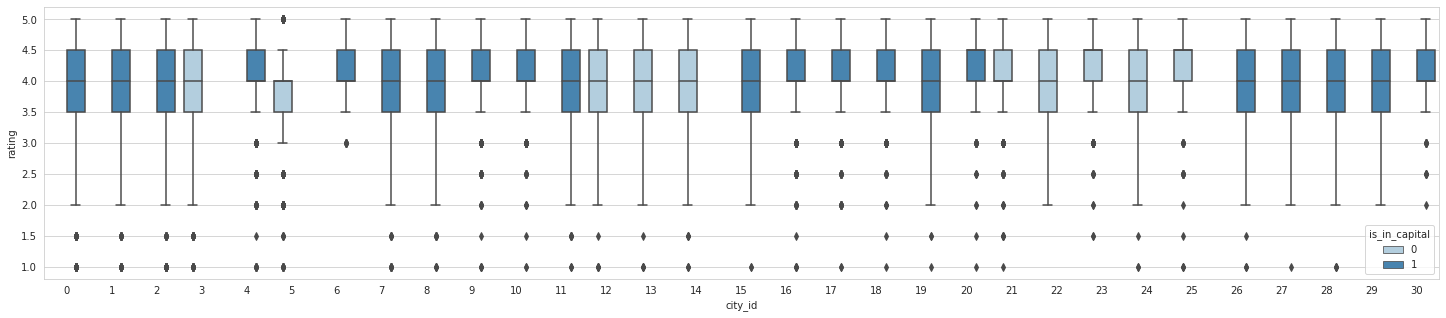

In [75]:
df = read_df()
id_as_int(df)
city_insights(df)

fig, ax = plt.subplots(figsize=(25, 5))
sns.boxplot(data = df, x = 'city_id', y = 'rating', hue = 'is_in_capital', palette = 'Blues')

Видим, что в некоторых городах отсутствуют рестораны с низким рейтингом, или мх меньше. От того, является ли город столицей, кажется, это не зависит.

Проверим связь между рейтингом ресторана и кол-вом ресторанов в городе.

'Коэфициент корреляции: -0.06'

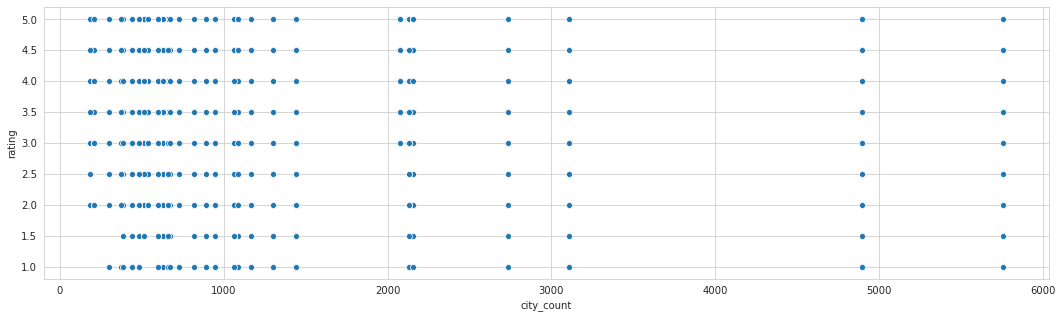

In [76]:
df = read_df()
id_as_int(df)
city_insights(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'city_count', y = 'rating')

corr_coef = df[['city_count','rating']].corr().loc['rating']['city_count'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Из графика опять ничего непонятно, коэфициент корреляции небольшой.

Посмотрим на связь между рейтингом ресторана и страной.

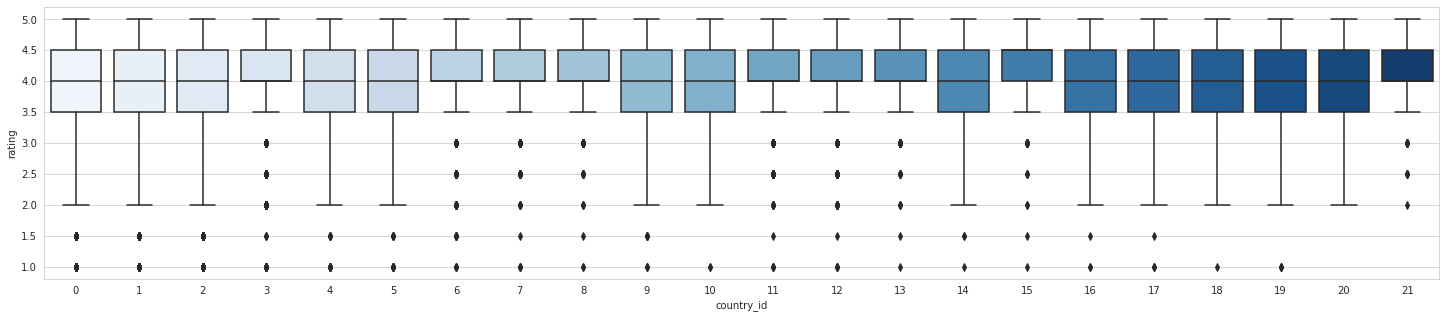

In [77]:
df = read_df()
id_as_int(df)
city_insights(df)

fig, ax = plt.subplots(figsize=(25, 5))
sns.boxplot(data = df, x = 'country_id', y = 'rating', palette = 'Blues')

Как и в случае с городами видим, что в некоторых странах, рестораны с низким рейтингом встречаются реже.

Посмотрим на признак столицы.

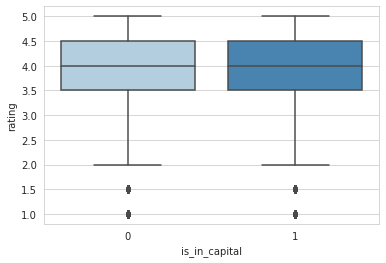

In [78]:
df = read_df()
id_as_int(df)
city_insights(df)

sns.boxplot(data = df, x = 'is_in_capital', y = 'rating', palette = 'Blues')

Никакой разницы.

Удаленность от столицы видимо тоже никаким образом не влияет на рейтинг.

'Коэфициент корреляции: -0.03'

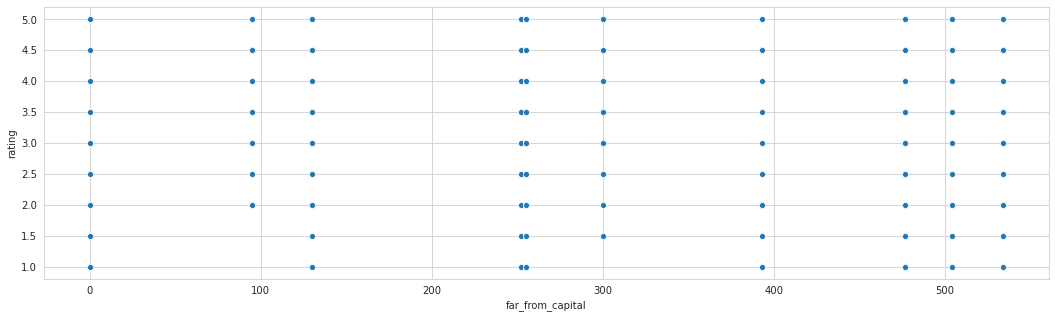

In [79]:
df = read_df()
id_as_int(df)
city_insights(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'far_from_capital', y = 'rating')

corr_coef = df[['far_from_capital','rating']].corr().loc['rating']['far_from_capital'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Коэфициент коррелляции низкий, но все же есть.

Посмотрим на влияние населения города.

'Коэфициент корреляции: 0.09'

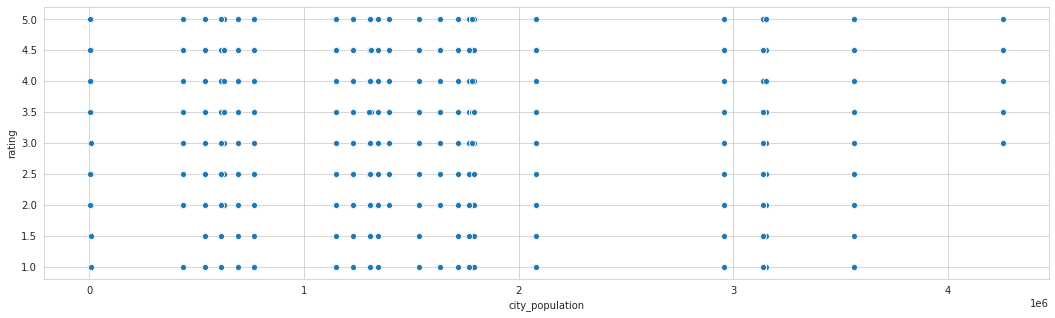

In [80]:
df = read_df()
id_as_int(df)
city_insights(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'city_population', y = 'rating')

corr_coef = df[['city_population','rating']].corr().loc['rating']['city_population'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Снова ничего непонятно, снова маленький коэфициент корреляции.

Посмотрим на влияние плотности населения в городе.

'Коэфициент корреляции: -0.03'

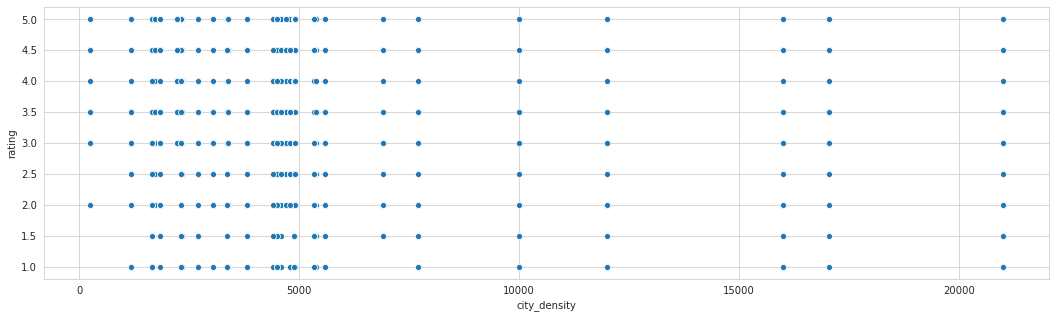

In [81]:
df = read_df()
id_as_int(df)
city_insights(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'city_density', y = 'rating')

corr_coef = df[['city_density','rating']].corr().loc['rating']['city_density'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

И снова то же самое.

Протестируем датасет с новыми признаками.

In [82]:
df = read_df()
id_as_int(df)
city_insights(df)
test_model(df)

MAE: 0.21383899999999997


Существенный прирост. Хорошо )

Поробуем сделать dummy-переменные из города и из страны.

In [83]:
def city_dummies(cd_df):
    cd_df = pd.get_dummies(cd_df, columns = ['city_id'], prefix = 'city_id_')
    return cd_df

In [84]:
def country_dummies(cd_df):
    cd_df = pd.get_dummies(cd_df, columns = ['country_id'], prefix = 'country_id_')
    return cd_df

In [85]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

test_model(df)

MAE: 0.21367949999999997


Еще небольшое улучшение.

### -----> cuisine


Заполним пропуски самыми часто встречающимися кухнями и сделаем кухни списком.

In [86]:
def cuisine_prepare(cp_df):
    cp_df['cuisine'] = cp_df['cuisine'].fillna("['Vegetarian Friendly', 'European']")
    cp_df['cuisine'] = cp_df['cuisine'] \
        .str.replace("'", '') \
        .str.replace("\[", '') \
        .str.replace("\]", '') \
        .str.split(', ');

Посчитаем кол-во кухонь в каждом ресторане.

In [87]:
def cuisine_count(cc_df):
    cuisine_index = list(cc_df.columns).index('cuisine')
    cc_df.insert(cuisine_index + 1, 'cuisines_count', None)
    cc_df['cuisines_count'] = cc_df['cuisine'].apply(lambda c: len(c))

Взглянем на взаимосвязь кол-ва кухонь с рейтингом.

'Коэфициент корреляции: 0.12'

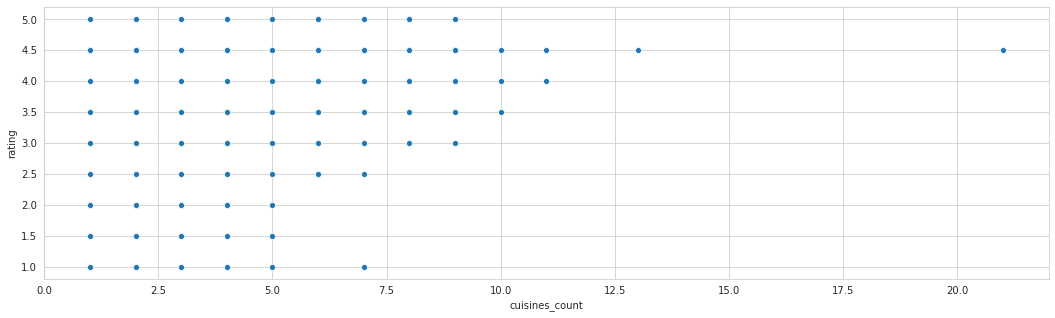

In [123]:
df = read_df()

cuisine_prepare(df)
cuisine_count(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'cuisines_count', y = 'rating')

corr_coef = df[['cuisines_count','rating']].corr().loc['rating']['cuisines_count'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Можем заметить, что у ресторанов, с большим кол-вом кохонь, как правило больший рейтинг.

In [124]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)

test_model(df)

MAE: 0.2126225


А что если заменить пропуски в кухнях на 'other' ?

In [90]:
def cuisine_prepare_other(cp_df):
    cp_df['cuisine'] = cp_df['cuisine'].fillna("['Other']")
    cp_df['cuisine'] = cp_df['cuisine'] \
        .str.replace("'", '') \
        .str.replace("\[", '') \
        .str.replace("\]", '') \
        .str.split(', ');

In [125]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare_other(df)
cuisine_count(df)

test_model(df)

MAE: 0.21266849999999998


Результат ухудшился. Оставим первый вариант.

Превратим кухни в dummy-переменные.

In [92]:
def cuisine_dummies(cd_df):
    cuisines = set(cd_df['cuisine'].explode().tolist())
    for cuisine_name in cuisines:
        column_name = 'cuisine_' + cuisine_name.lower().replace(' ', '_')
        cd_df[column_name] = cd_df['cuisine'].apply(lambda cuisines: int(cuisine_name in cuisines))
    df.drop('cuisine', axis = 'columns', inplace = True)

In [126]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

test_model(df)

MAE: 0.20968849999999997


Dummy-переменные кухонь улучшили точность предсказания.

### -----> rank

'Коэфициент корреляции: -0.37'

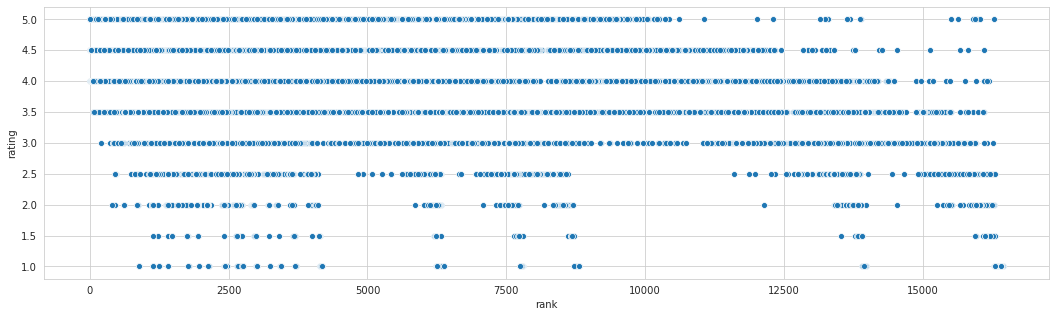

In [127]:
df = read_df()

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'rank', y = 'rating')

corr_coef = df[['rank','rating']].corr().loc['rating']['rank'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Знакомая картина. Где то мы это уже видели.

'Коэфициент корреляции: 1.0'

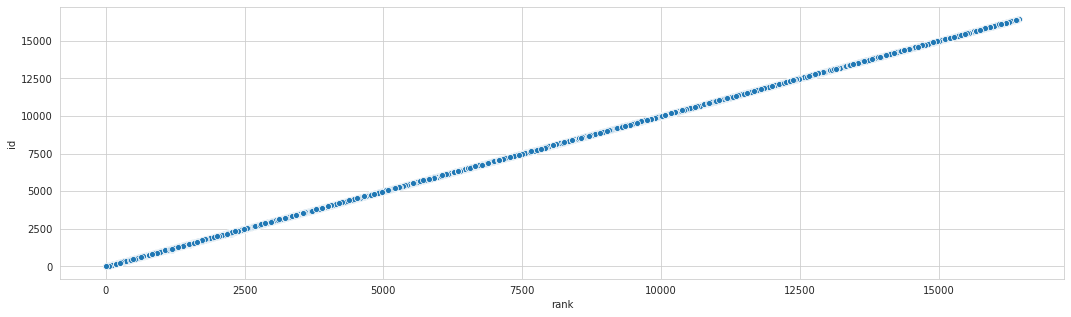

In [95]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'rank', y = 'id')

corr_coef = df[['rank','id']].corr().loc['id']['rank'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Rank полностью скоррелирован с id

### -----> price

Превратим ценовую категорию в числовой признак заменив пропуски на среднюю ценовую категорию.

In [96]:
def price_zone(price):
        if price == '$':
            return 1
        elif price == '$$ - $$$':
            return 2
        elif price == '$$$$':
            return 3
        else:
            return 2
        

def price_number(pn_df, convert):
    pn_df['price'] = pn_df['price'].apply(convert).astype(int)

'Коэфициент корреляции: -0.03'

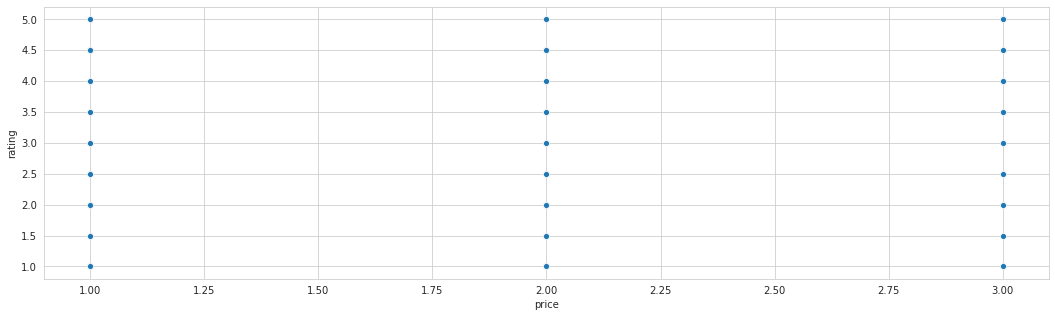

In [128]:
df = read_df()

price_number(df, price_zone)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'price', y = 'rating')

corr_coef = df[['price','rating']].corr().loc['rating']['price'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Как и обычно, видим  слабый коэффициент корреляции.

In [129]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone)

test_model(df)

MAE: 0.20945249999999996


Попробуем заменить пропуски на 0.

In [99]:
def price_zone_zero(price):
        if price == '$':
            return 1
        elif price == '$$ - $$$':
            return 2
        elif price == '$$$$':
            return 3
        else:
            return 0

In [130]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

test_model(df)

MAE: 0.20915949999999997


Еще лучше.

### -----> reviews count

Заполним пропуски средним количеством отзывов.

In [101]:
def mean_reviews_count(mrc_df):
    mrc_df['reviews count'].fillna(value = mrc_df['reviews count'].mean(), inplace = True)

In [131]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

mean_reviews_count(df)

test_model(df)

MAE: 0.21025649999999996


 Попрубем заменить нулем.

In [133]:
def zero_reviews_count(mrc_df):
    mrc_df['reviews count'].fillna(value = 0, inplace = True)

In [134]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

test_model(df)

MAE: 0.20915949999999997


То же самое что и было

### -----> reviews


Посчитаем время, прошедшее с последнего отзыва и время между отзывами.

In [103]:
def split_reviews_dates(string):
    split_position = string.find('], [')
    reviews_end_position = split_position
    dates_start_position = split_position + 4
    reviews_string = string[0:reviews_end_position].replace('[', '')
    dates_string = string[dates_start_position:].replace(']', '')
    reviews = list(map(lambda review: review[1:-1], reviews_string.split(', ')))
    dates = list(map(lambda date: date[1:-1], dates_string.split(', ')))
    reviews = list(filter(lambda item: len(item) > 0, reviews))
    dates = list(filter(lambda item: len(item) > 0, dates))
    dates = list(map(lambda item: datetime.strptime(item, '%m/%d/%Y'), dates))
    return reviews, dates

In [104]:
def get_reviews_list(string):
    return split_reviews_dates(string)[0]

In [105]:
def get_dates_list(string):
    return split_reviews_dates(string)[1]

In [106]:
def get_last_date(string):
    dates = get_dates_list(string)
    if len(dates) > 0:
        return max(dates)
    else:
        return datetime.strptime('01/01/1971', '%m/%d/%Y')

In [107]:
def get_time_between(string):
    dates = get_dates_list(string)
    if len(dates) > 1:
        diffs = []
        for i in range(1, len(dates)):
            diffs.append(abs((dates[i] - dates[i-1]).days))
        return  stat.mean(diffs)
    else:
        return 0

In [108]:
def get_time_from_last_review(string):
    last_date = get_last_date(string)
    now = datetime.now()
    from_last = now - last_date
    return from_last.days

In [109]:
 def reviews_insights(ri_df):
    ri_df['reviews'] = ri_df['reviews'].str.replace('\"', '').str.replace('\"', '');
    reviews_index = list(ri_df.columns).index('reviews')
    df.insert(reviews_index + 1, 'reviews_count', None)
    df.insert(reviews_index + 2, 'time_between_reviews', None)
    df.insert(reviews_index + 3, 'time_from_last_review', None)
    df['reviews_count'] = df['reviews'].map(lambda reviews: len(get_reviews_list(reviews)))
    df['time_between_reviews'] = df['reviews'].map(lambda reviews: get_time_between(reviews))
    df['time_from_last_review'] = df['reviews'].map(get_time_from_last_review)
    df.drop('reviews', axis = 'columns', inplace = True)

'Коэфициент корреляции: -0.07'

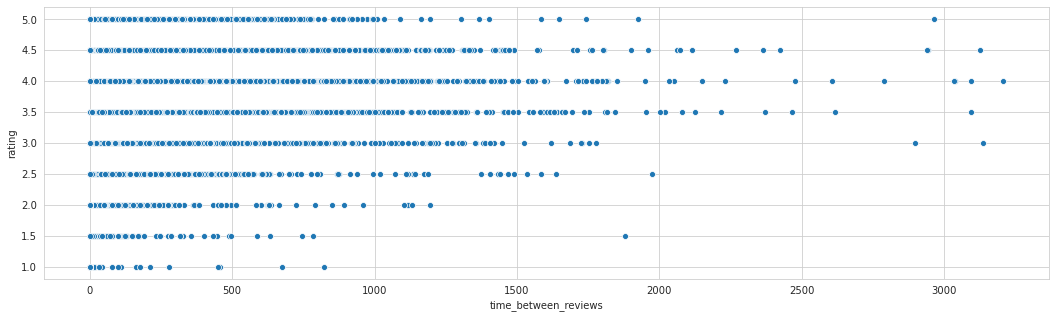

In [110]:
df = read_df()

reviews_insights(df)


fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'time_between_reviews', y = 'rating')

corr_coef = df[['time_between_reviews','rating']].corr().loc['rating']['time_between_reviews'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))


Видим, что у ресторанов с низким рейтингом, время между отзывами преимущественно короткое. Может быть, это связанно с тем, что среди ресторанов с высоким рейтингом мало молодых ресторанов.

'Коэфициент корреляции: -0.03'

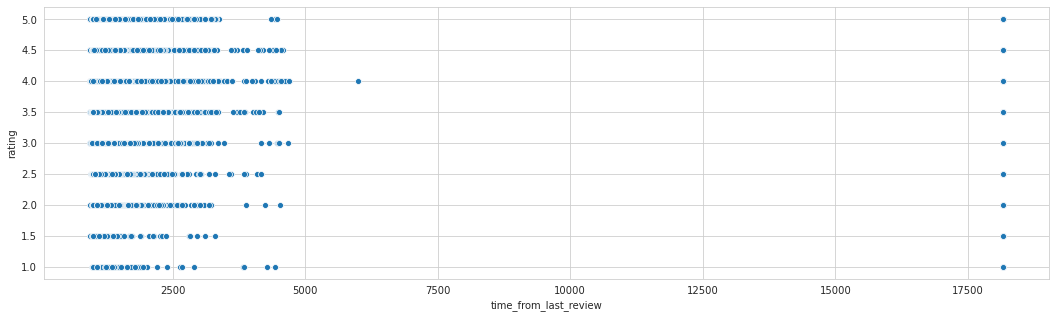

In [111]:
df = read_df()

reviews_insights(df)

fig, ax = plt.subplots(figsize=(18, 5))
sns.scatterplot(data = df, x = 'time_from_last_review', y = 'rating')

corr_coef = df[['time_from_last_review','rating']].corr().loc['rating']['time_from_last_review'];
display('Коэфициент корреляции: ' + str(round(corr_coef, 2)))

Похожая картина.

In [140]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

test_model(df)

MAE: 0.20585749999999997


### -----> url_ta

Очень интересное поле. Понятно, что можно спарсить оттуда много чего интересного и посмотреть, что получится, но, к сожалению, времени на это нет. Просто удалим.

Хотя, если честно, непонятно зачем предсказывать рейтинг ресторана на трипэдвизоре, имея доступ к странице ресторана на нем же.

In [113]:
def drop_url_ta(dut_df):
    dut_df.drop('url_ta', axis = 'columns', inplace = True)

### -----> id_ta
Преобразуем id_ta в число, предполагая, что id может нам показать давность появления ресторана в базе данных tripadvisor.

In [114]:
def id_ta_as_int(itai_df):
    itai_df['id_ta'] = itai_df['id_ta'].str[1:].astype(int)

In [141]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)

id_ta_as_int(df)

test_model(df)

MAE: 0.20695499999999997


Не помогло. тоже удалим.

In [138]:
def drop_id_ta(dit_df):
    dit_df.drop('id_ta', axis = 'columns', inplace = True)

In [142]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

test_model(df)

MAE: 0.20585749999999997


## Посмотрим корреляцию по признакам

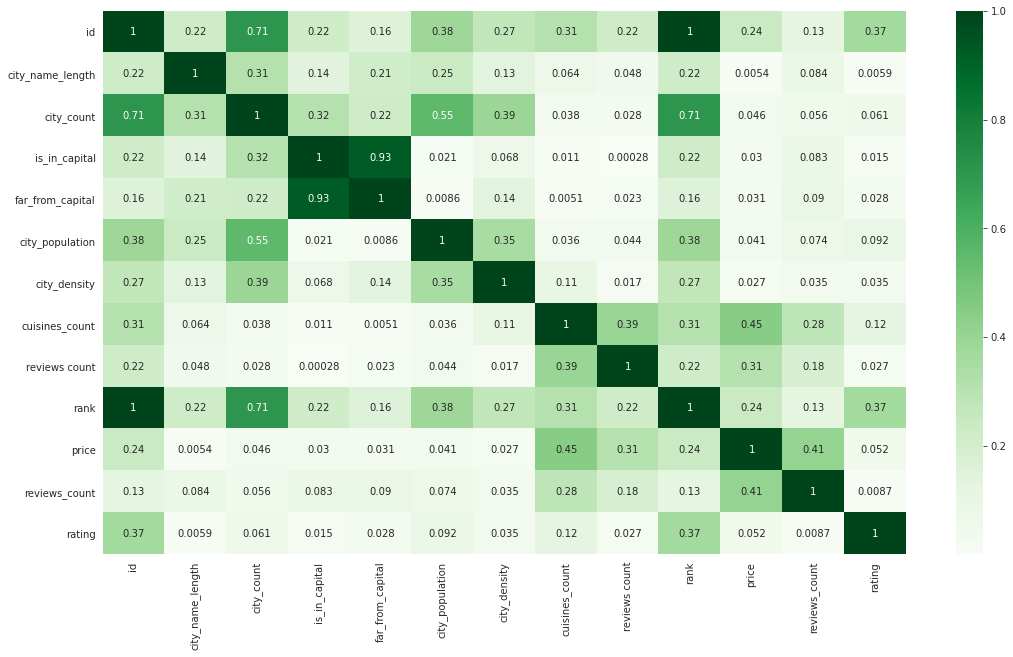

In [144]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

df_corr = df[[
    'id', 'city_name_length', 'city_count', 'is_in_capital', 'far_from_capital', 'city_population', 
    'city_density', 'cuisines_count', 'reviews count', 'rank', 'price', 'reviews_count', 'rating'
    ]]

corr = df_corr.corr().apply(abs);

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, cmap = 'Greens', annot = corr)

Видим, что максимальная корреляция рейтинга наблюдается с полем rank и id, которые в свою очередь в точности скоррелированны между собой. Самая слабая корреляция у поля рейтинг наблюдается с полями city_name_length, reviews_count, is_in_capital. Попробуем поочередно удалить их из датасета.

In [145]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

df.drop('city_name_length', axis = 'columns', inplace = True)

test_model(df)

MAE: 0.20600700000000002


In [146]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

df.drop('reviews_count', axis = 'columns', inplace = True)

test_model(df)

MAE: 0.205788


In [147]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

df.drop('is_in_capital', axis = 'columns', inplace = True)

test_model(df)

MAE: 0.20578049999999998


In [148]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

df.drop('city_name_length', axis = 'columns', inplace = True)

test_model(df)

MAE: 0.20600700000000002


удаление полей reviews_count и is_in_capital улучшило оценку.

In [149]:
df = read_df()

id_as_int(df)

city_insights(df)
df = city_dummies(df)
df = country_dummies(df)

cuisine_prepare(df)
cuisine_count(df)
cuisine_dummies(df)

price_number(df, price_zone_zero)

zero_reviews_count(df)

reviews_insights(df)

drop_url_ta(df)
drop_id_ta(df)

df.drop('reviews_count', axis = 'columns', inplace = True)
df.drop('is_in_capital', axis = 'columns', inplace = True)

test_model(df)

MAE: 0.2055685


# **Итоговый результат MAE = 0.2055685**